# Projekt - 2. část

Cíle 2. části projektu jsou:
* provedení explorativní analýzy na zvolené datové sadě
* úpravu datové sady do podoby vhodné pro dolování

## 1. Úkol
### Zadání: 
Z dostupných datových sad si zvolte jednu datovou sadu, kterou se budete dále zabývat. Stáhněte si zvolenou datovou sadu z uvedeného zdroje a prostudujte si dostupné informace k této datové sadě.

### Řešení: 
Vybraná datová sada Most Streamed Spotify Songs 2023 – dostupná zde: [https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [240]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## 2. Úkol
### Zadání: 
Proveďte explorativní analýzu zvolené datové sady. Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
1. prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
2. prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.
3. zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.
4. proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.
5. proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

### Řešení:

#### 1. Podúkol:
Prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

Analýza jednotlivých atributů jako celku:

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [242]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [243]:
df.describe(include = [object])

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,953,903,858,953
unique,943,645,949,348,198,11,2
top,Daylight,Taylor Swift,723894473,0,0,C#,Major
freq,2,34,2,24,344,120,550


Analýza vybraných kategorických atributů:

In [244]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

In [245]:
# Zobrazení názvu skladeb, které se ve sloupci 'track_name' nacházejí více než jednou
df['track_name'].value_counts()

track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64

In [246]:
# Filtrace pouze těch skupin, které mají více než jednoho interpreta
grouped = df.groupby('track_name')['artist(s)_name'].apply(list).reset_index()
grouped[grouped['artist(s)_name'].str.len() > 1]

,track_name,artist(s)_name
22,About Damn Time,"[Lizzo, Lizzo]"
192,Daylight,"[David Kushner, Harry Styles]"
200,Die For You,"[The Weeknd, Joji]"
277,Flowers,"[Miley Cyrus, Lauren Spencer Smith]"
425,Let It Snow! Let It Snow! Let It Snow!,"[Dean Martin, Frank Sinatra, B. Swanson Quartet]"
503,Miss You,"[Robin Schulz, Oliver Tree, Southstar]"
550,Numb,"[Linkin Park, Marshmello, Khalid]"
656,SNAP,"[Rosa Linn, Rosa Linn]"
660,SPIT IN MY FACE!,"[ThxSoMch, ThxSoMch]"
783,Take My Breath,"[The Weeknd, The Weeknd]"


In [247]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [248]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

Z dat výše bylo zjištěno, že se některé sloupce chovají jako objekt, přestože obsahují číselná data, tudíž data budou upravena na numerické atributy. Některé atributy jsou rovněž neintuitivně pojmenovány a budou přejmenovány.

In [249]:
attributes_to_numeric = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

for attribute in attributes_to_numeric:
    df[attribute] = df[attribute].str.replace(',', '').apply(pd.to_numeric, errors='ignore')
    df[attribute] = pd.to_numeric(df[attribute], errors='coerce')
    
df[attributes_to_numeric].dtypes

streams                float64
in_deezer_playlists      int64
in_shazam_charts       float64
dtype: object

#### 2. Podúkol

Prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.

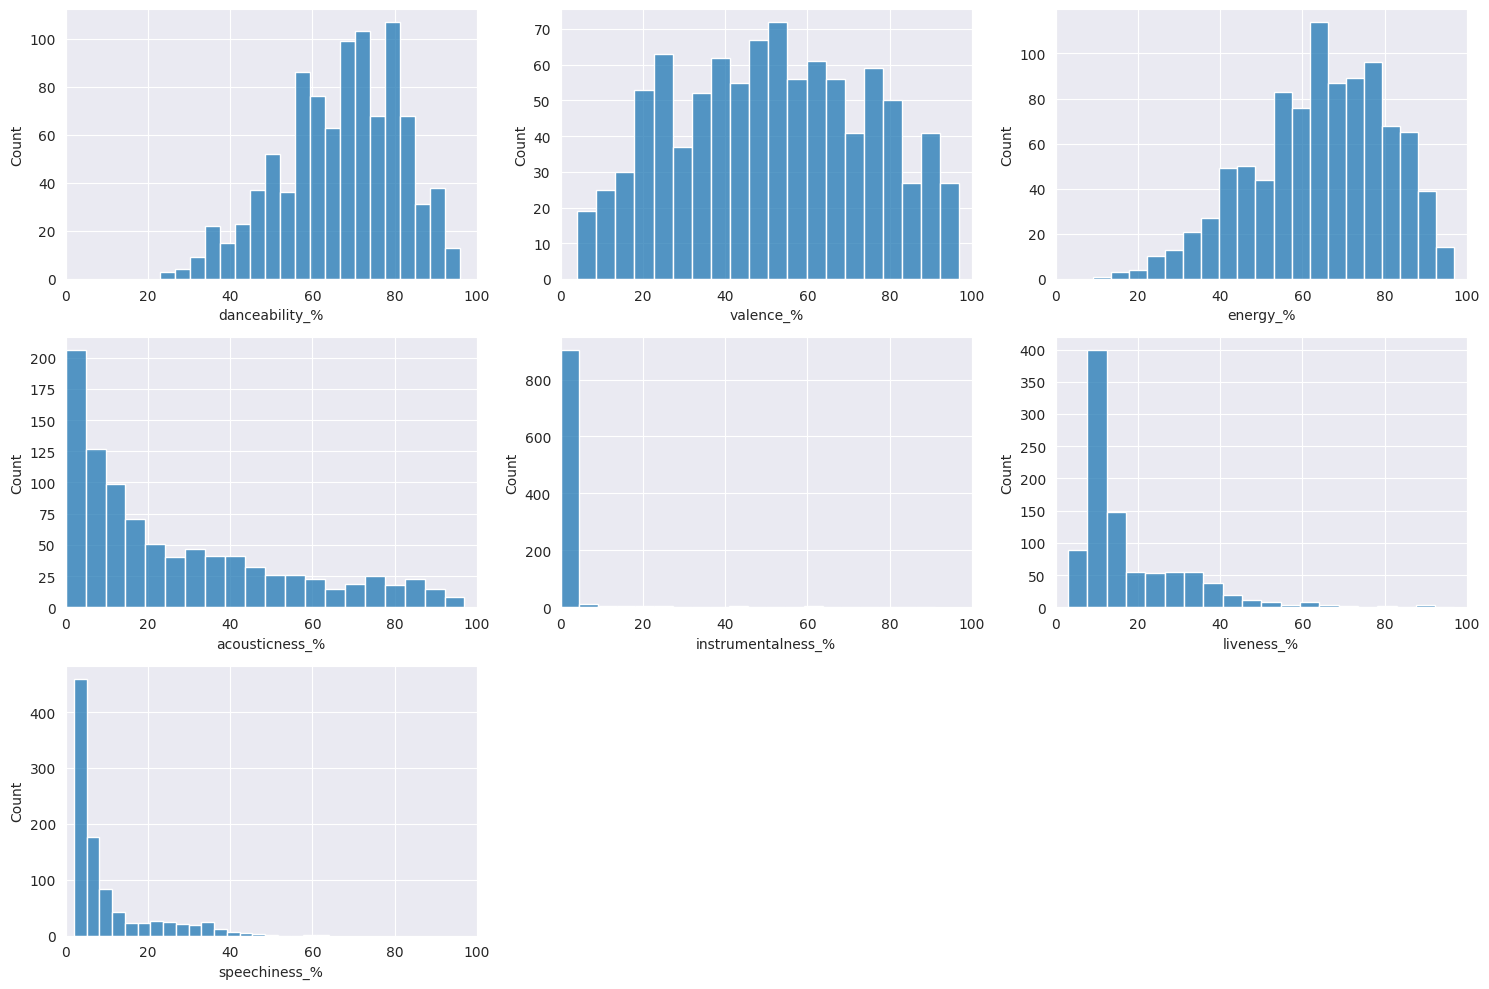

In [250]:
columns_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(15, 10)) 

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20)
    plt.xlim(0, 100)
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

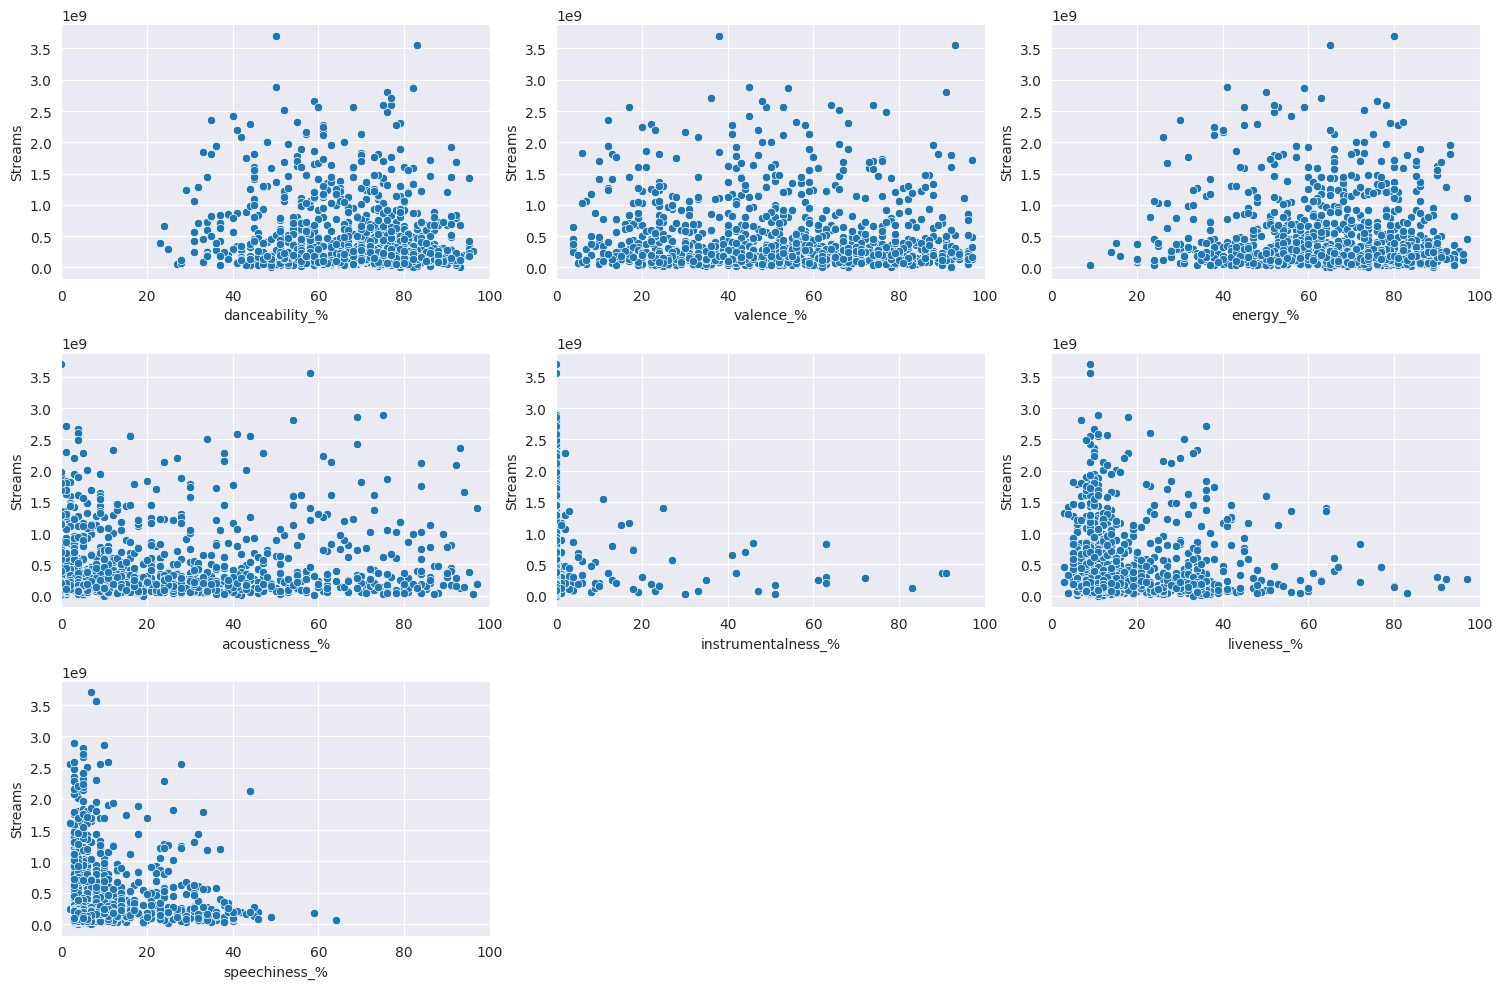

In [251]:
plt.figure(figsize=(15, 10)) 

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y='streams')
    plt.xlabel(column)
    plt.xlim(0,100)
    plt.ylabel('Streams')

plt.tight_layout()
plt.show()

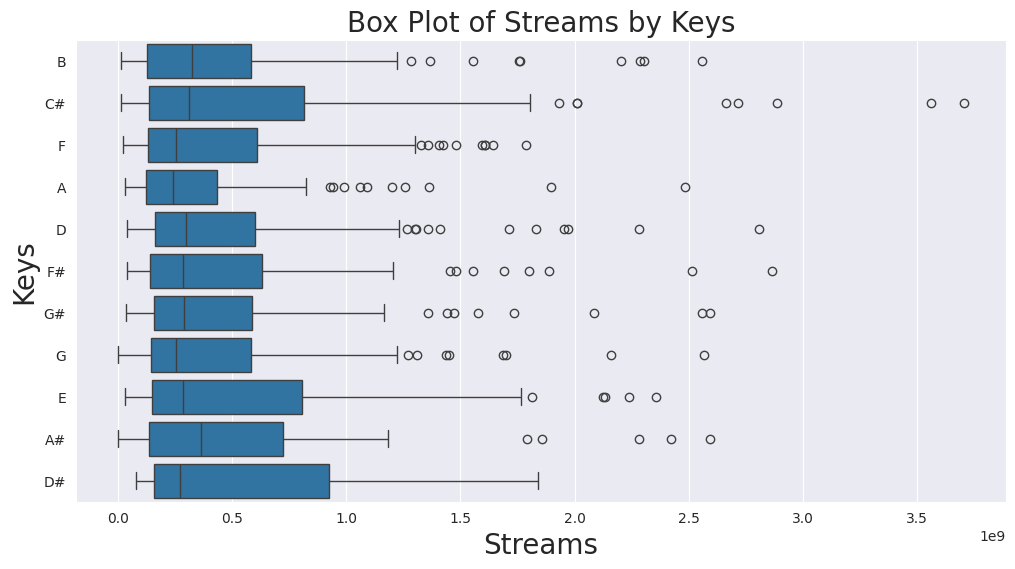

In [252]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

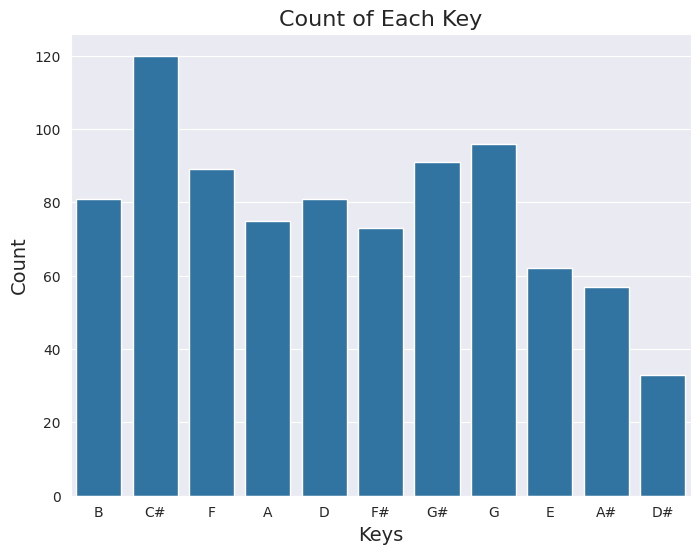

In [253]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df)
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

#### 3. Podúkol

Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.

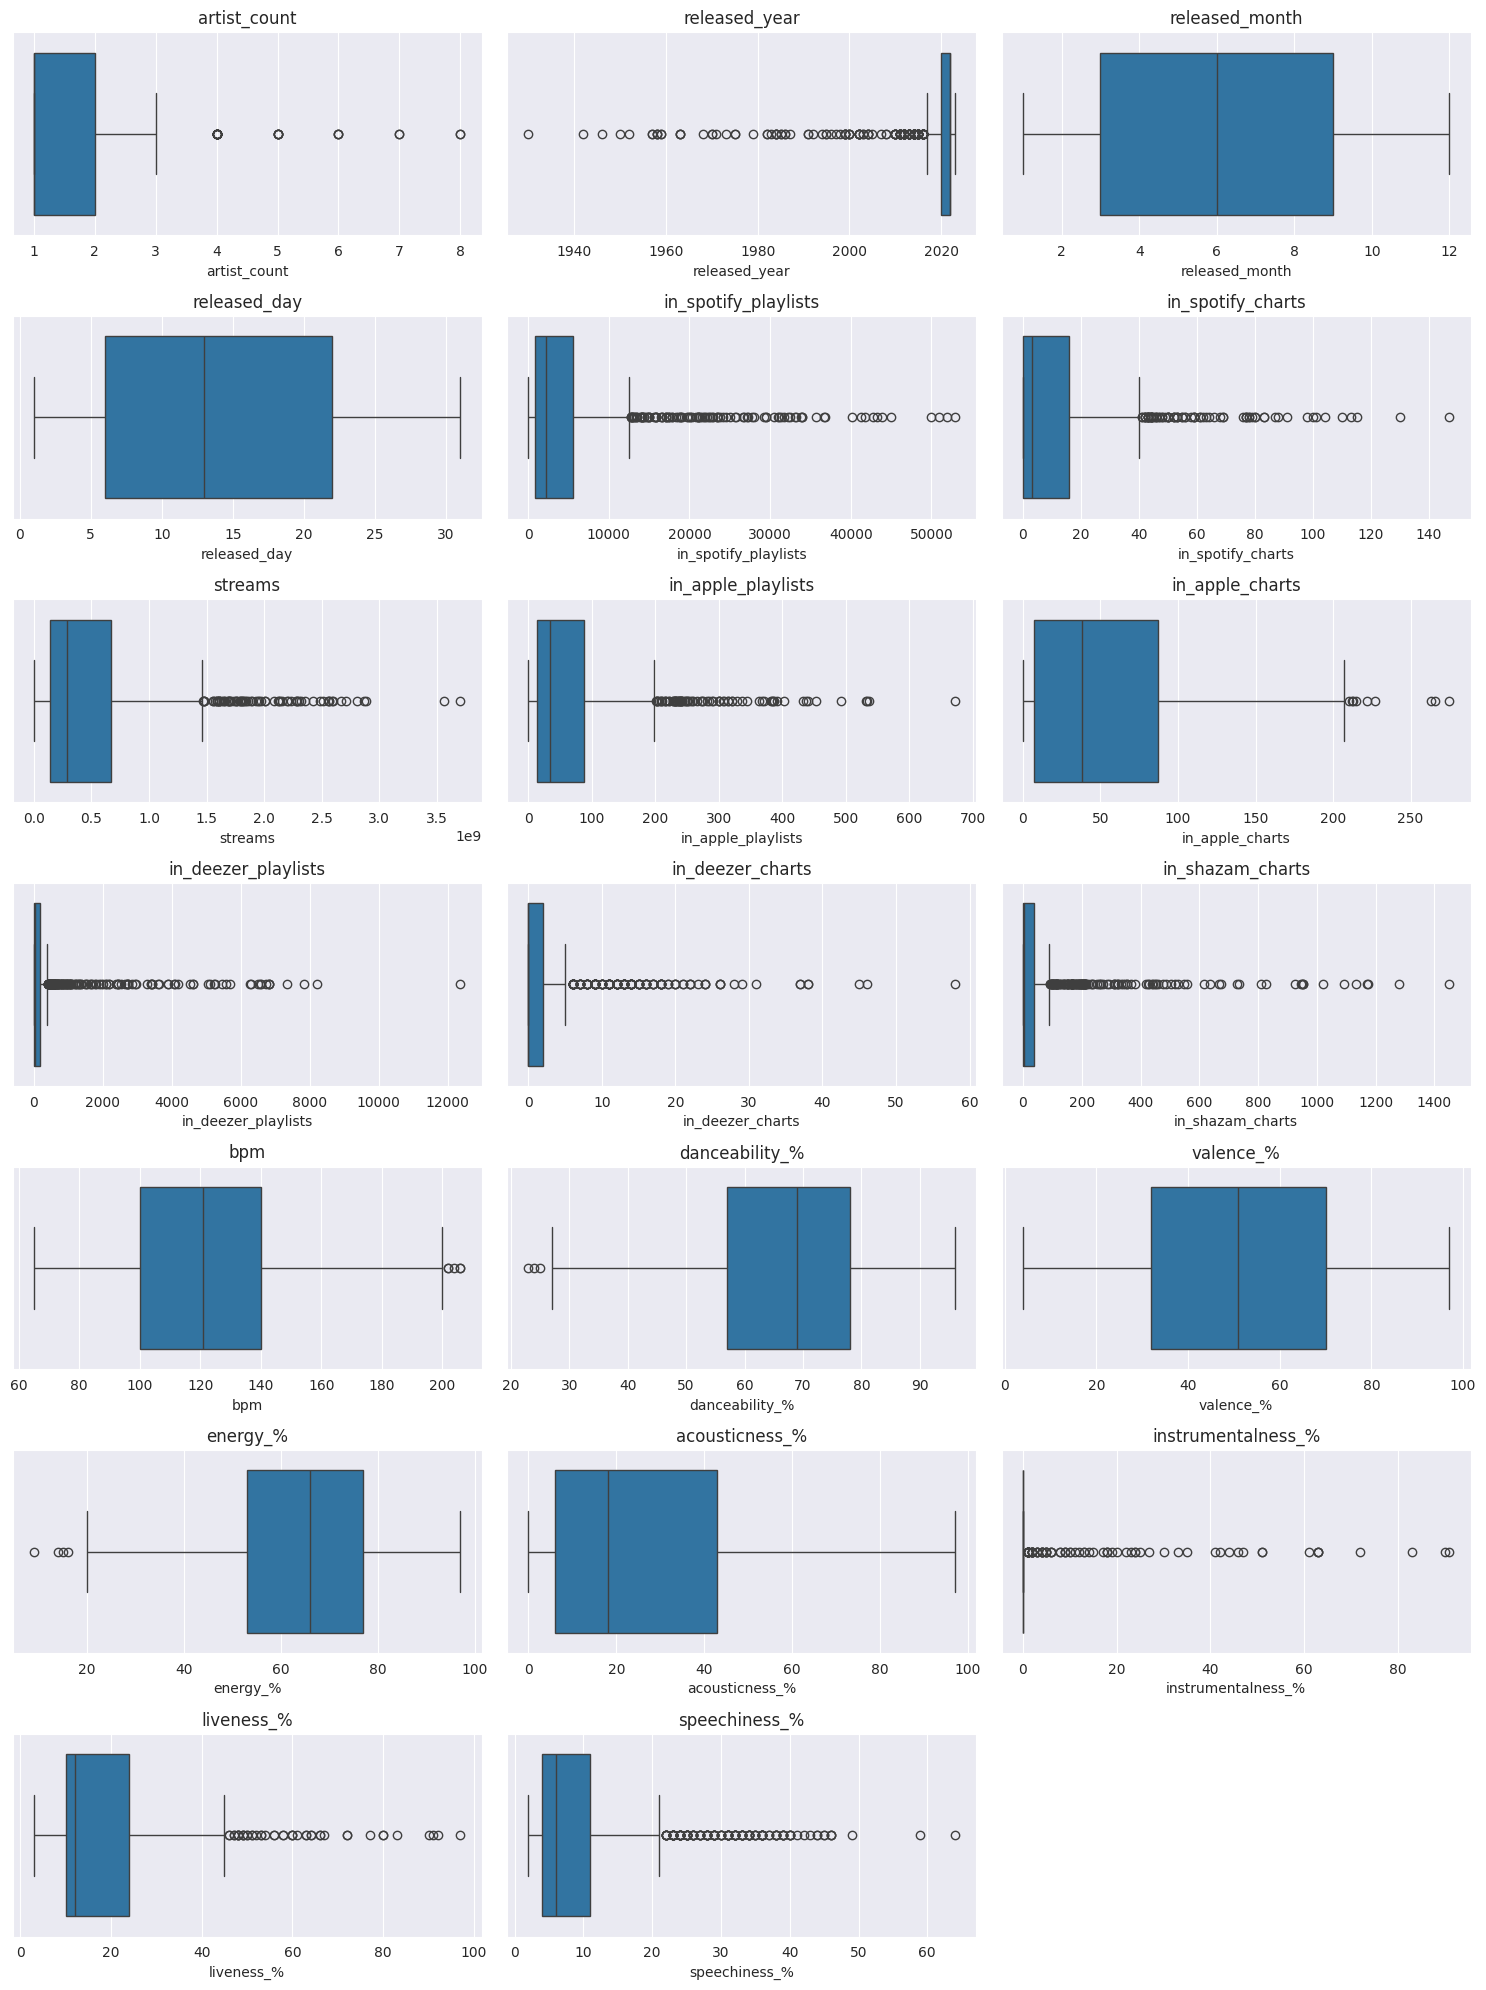

In [254]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### 4. Podúkol

Proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.

In [255]:
# Výpočet počtu chybějících hodnot pro každý sloupec
missing_values = df.isnull().sum()

# Převod Series na DataFrame
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Missing Values'])
missing_values_df.index.name = 'Attribute'

missing_values_df

,Missing Values
Attribute,
streams,1
in_shazam_charts,50
key,95


In [256]:
df[df['streams'].isnull()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [257]:
df[df['in_shazam_charts'].isnull()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1.813674e+09,250,...,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2.557976e+09,386,...,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2.282771e+09,166,...,124,A#,Major,61,41,81,5,2,10,3
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2.322580e+09,437,...,95,NaN,Major,55,56,82,12,0,34,5
158,Ghost,Justin Bieber,1,2021,3,19,5866,24,1.167331e+09,107,...,154,D,Major,61,41,74,21,0,40,6
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,9.299648e+08,133,...,117,A,Minor,73,31,69,6,0,11,4
180,Night Changes,One Direction,1,2014,11,17,7124,18,1.131091e+09,60,...,120,G#,Major,67,40,52,86,0,12,4


In [258]:
df[df['key'].isnull()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,NaN,Major,71,65,68,6,0,3,7
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,1.231224e+08,22,...,120,NaN,Major,81,63,68,11,0,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,6.515620e+07,82,...,144,NaN,Major,77,75,58,52,0,23,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,2.842166e+08,165,...,126,NaN,Major,67,49,77,11,0,19,11
901,After LIKE,IVE,1,2022,8,22,767,12,2.655488e+08,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,...,137,NaN,Major,74,71,89,24,61,15,5
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,...,110,NaN,Major,48,15,31,80,22,12,4


In [259]:
# Výpočet počtu chybějících hodnot pro každý řádek
missing_per_row = df.isnull().sum(axis=1)

# Získání počtu řádků pro každý počet chybějících hodnot
row_counts = missing_per_row.value_counts().sort_index()

# Převod na DataFrame pro lepší prezentaci
row_counts_df = pd.DataFrame(row_counts).reset_index()
row_counts_df.columns = ['Count of missing values', 'Number of rows']

row_counts_df

,Count of missing values,Number of rows
0,0,816
1,1,128
2,2,9


In [260]:
# Filtrace pro zobrazení řádků s právě jednou chybějícími hodnotami
rows_with_one_missing = df[missing_per_row == 1]

rows_with_one_missing

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,NaN,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,174,F#,Minor,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,1.231224e+08,22,...,120,NaN,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,2.655488e+08,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,...,137,NaN,Major,74,71,89,24,61,15,5
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,1.404303e+08,0,...,125,D#,Minor,49,13,74,0,0,9,4
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,...,110,NaN,Major,48,15,31,80,22,12,4


In [261]:
# Filtrace pro zobrazení řádků s právě dvěmi chybějícími hodnotami
rows_with_two_missing = df[missing_per_row == 2]

rows_with_two_missing

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2.322580e+09,437,...,95,NaN,Major,55,56,82,12,0,34,5
395,Space Song,Beach House,1,2015,1,1,17852,4,7.897539e+08,69,...,147,NaN,Minor,51,62,79,22,13,14,3
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,3.396598e+08,49,...,93,NaN,Minor,65,82,74,27,0,32,5
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,0,4.327200e+08,95,...,206,NaN,Minor,58,83,45,36,0,11,8
531,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1.056760e+09,138,...,65,NaN,Major,31,31,24,76,0,14,4
532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia",2,2021,10,22,7495,17,6.119942e+08,114,...,120,NaN,Minor,56,16,67,0,0,11,4
554,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",3,2021,3,19,14140,0,1.445942e+09,231,...,90,NaN,Major,63,49,68,38,0,42,18
560,Life Goes On,Oliver Tree,1,2020,7,17,2868,0,5.015417e+08,43,...,80,NaN,Major,70,57,49,19,0,12,8
727,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1.457139e+09,217,...,129,NaN,Major,86,75,52,54,0,10,4


#### 5. Podúkol

Proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

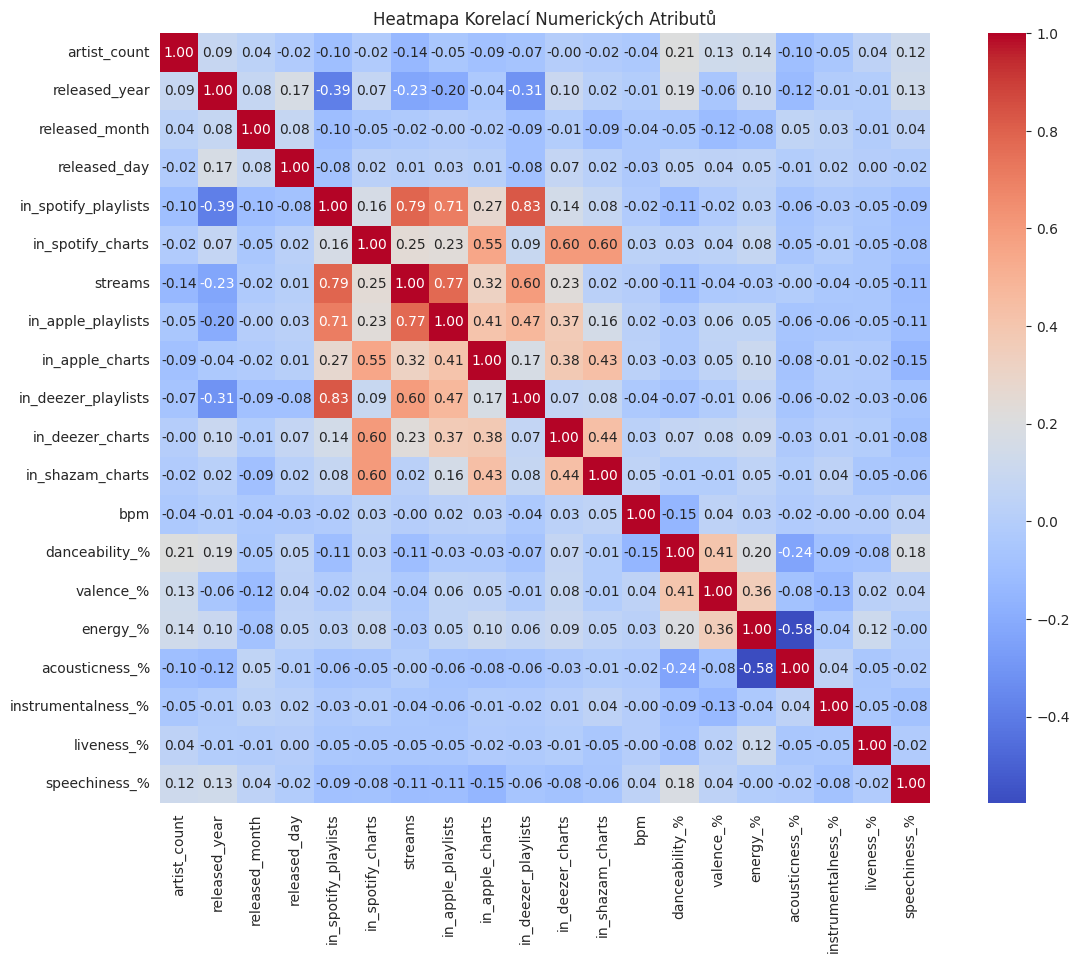

In [262]:
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix_numerical = numerical_data.corr()

# Vytvoření heatmapy
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmapa Korelací Numerických Atributů')
plt.show()

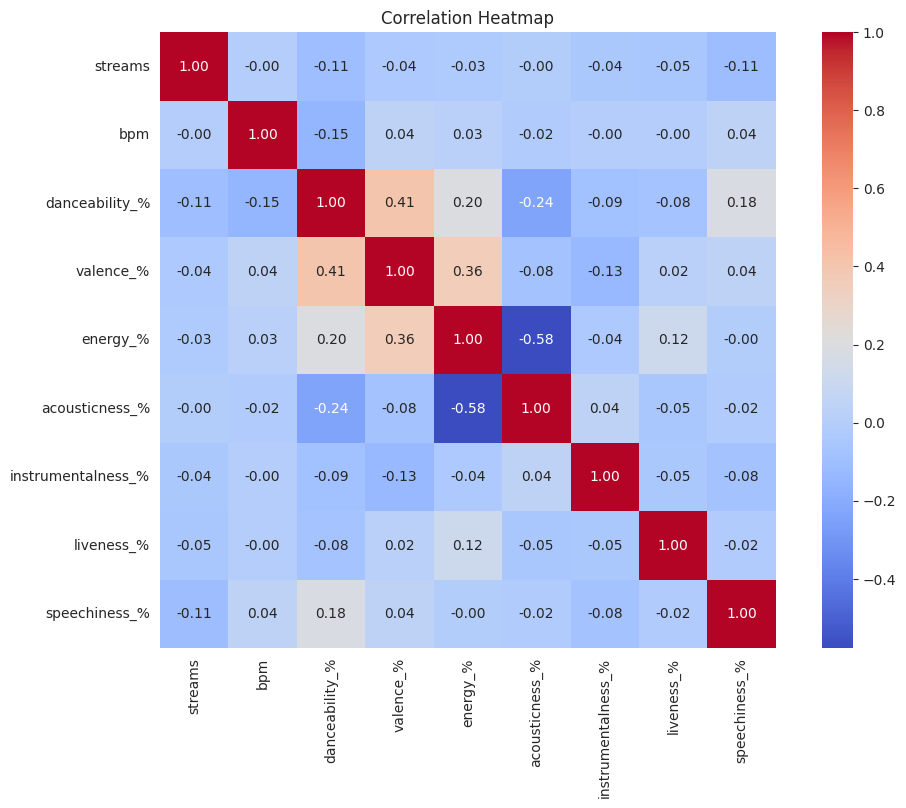

In [263]:
columns_to_correlate = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

correlation_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

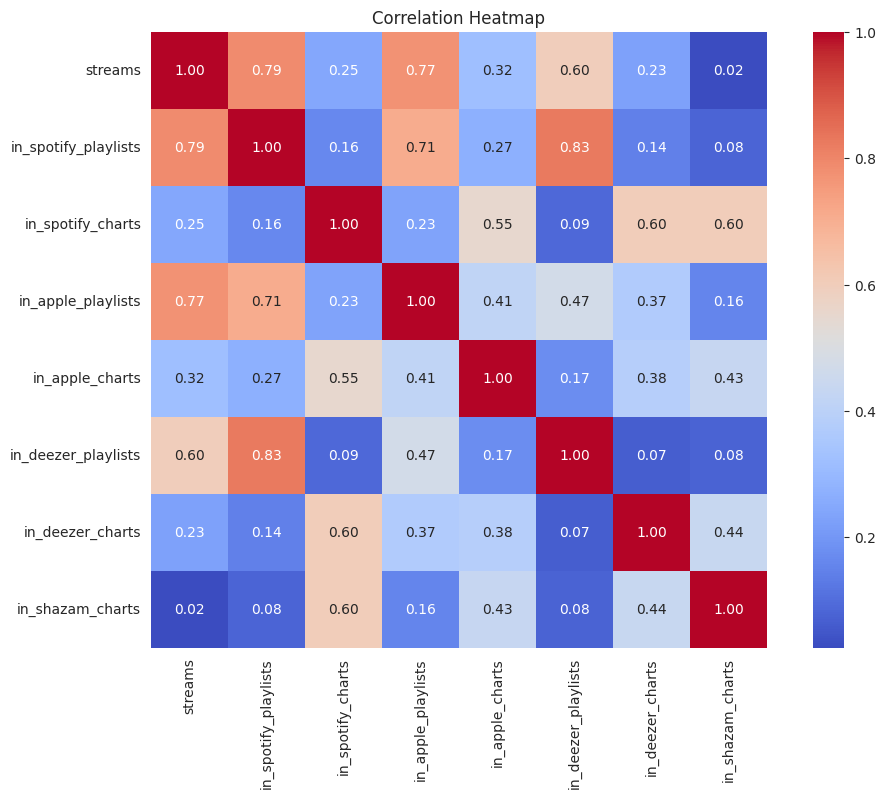

In [264]:
columns_to_correlate = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

correlation_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()